In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
df = pd.read_csv('/Users/xingobar/Downloads/fec-independent-expenditures.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8,9,10,15,16,21,24,28,29,30,31,32,35,36,44,63,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,committee_id,committee_name,report_year,report_type,image_number,line_number,file_number,payee_name,payee_first_name,payee_middle_name,...,link_id,sub_id,payee_prefix,payee_suffix,is_notice,memo_text,filer_prefix,filer_suffix,schedule_type,pdf_url
0,C00042366,DEMOCRATIC SENATORIAL CAMPAIGN COMMITTEE,2013,24.0,13962841204,NaN,873350.0,RALSTON LAPP MEDIA,NaN,NaN,...,4062620131192064388,4062620131192066082,NaN,NaN,t,NaN,NaN,NaN,SE,http://docquery.fec.gov/cgi-bin/fecimg/?139628...
1,C00042622,MASSACHUSETTS REPUBLICAN PARTY,2013,24.0,13963170774,NaN,875042.0,CAMPAIGN HOMEBANK LLC,NaN,NaN,...,4062620131192064391,4062620131192066088,NaN,NaN,t,NaN,NaN,NaN,SE,http://docquery.fec.gov/cgi-bin/fecimg/?139631...
2,C00042622,MASSACHUSETTS REPUBLICAN PARTY,2013,24.0,13963170774,NaN,875042.0,CONNECTION STRATEGY LLC,NaN,NaN,...,4062620131192064391,4062620131192066089,NaN,NaN,t,NaN,NaN,NaN,SE,http://docquery.fec.gov/cgi-bin/fecimg/?139631...
3,C00484642,SENATE MAJORITY PAC,2013,48.0,13964445087,NaN,881782.0,WATERFRONT STRATEGIES,NaN,NaN,...,4072520131194234771,4072520131194237190,NaN,NaN,t,NaN,NaN,NaN,SE,http://docquery.fec.gov/cgi-bin/fecimg/?139644...
4,C00486845,LEAGUE OF CONSERVATION VOTERS VICTORY FUND,2013,48.0,13940511212,NaN,863741.0,"TERRA STRATEGIES, LLC",NaN,NaN,...,4040220131185953329,4040220131185956806,NaN,NaN,t,NaN,NaN,NaN,SE,http://docquery.fec.gov/cgi-bin/fecimg/?139405...


# Top Ten Payee (Non-Contributor)

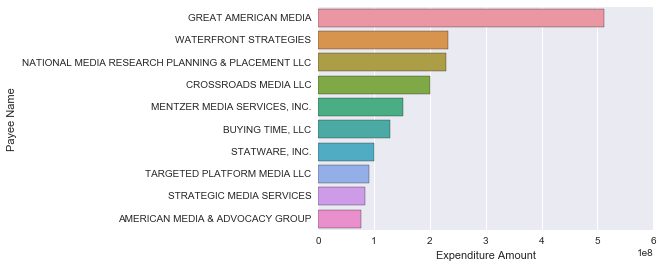

In [4]:
table_count = df.groupby(df['payee_name'])['expenditure_amount'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
payee_index = table_count.index
payee_val = table_count.values
sns.barplot(x = payee_val,y=payee_index,orient='h')
plt.ylabel('Payee Name')
plt.xlabel('Expenditure Amount')

# Number of Reported Year

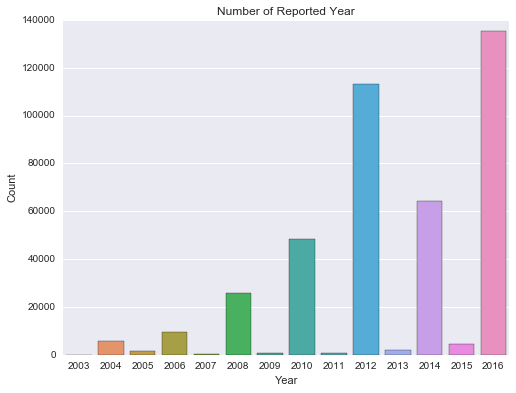

In [5]:
fig,ax = plt.subplots(figsize=(8,6))
sns.countplot(df.report_year,ax=ax)
#ticks = plt.setp(ax.get_xticklabels(),rotation=45)
plt.title('Number of Reported Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Committee Office Dollars

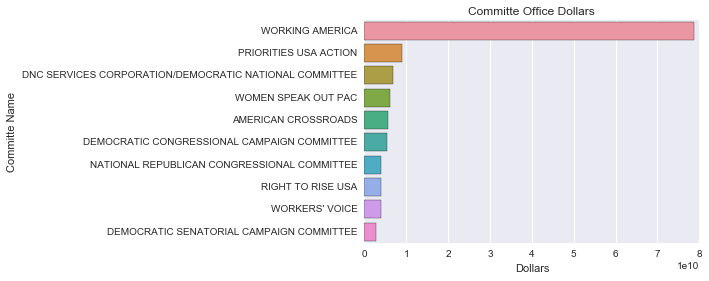

In [6]:
table_count = df.groupby(df.committee_name)['office_total_ytd'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
committe_office_idx = table_count.index
committe_office_val = table_count.values
sns.barplot(x = committe_office_val,y=committe_office_idx,orient='h')
plt.title('Committe Office Dollars')
plt.ylabel('Committe Name')
plt.xlabel('Dollars')

# Category vs Expenditure Amount

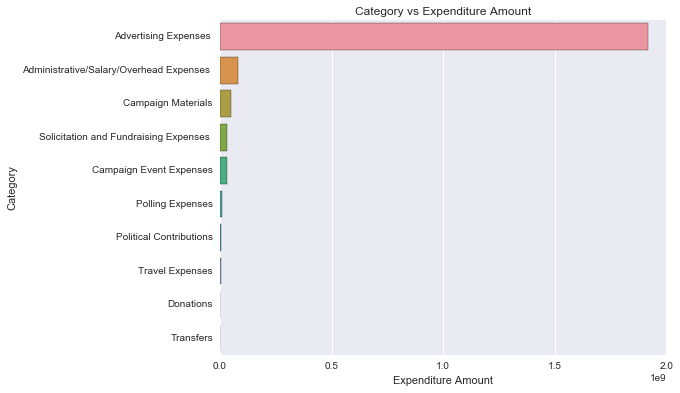

In [7]:
table_count = df.groupby(df.category_code_full)['expenditure_amount'].sum()
table_count = table_count.sort_values(ascending=False)[:10]
category_code_idx = table_count.index
category_code_val = table_count.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = category_code_val,y=category_code_idx,orient='h')
plt.ylabel('Category')
plt.xlabel('Expenditure Amount')
plt.title('Category vs Expenditure Amount')

# Candidate Office Count

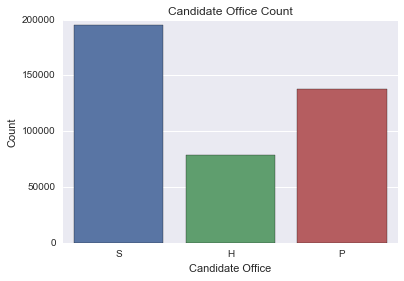

In [8]:
plt.title('Candidate Office Count')
sns.countplot(df.candidate_office)
plt.ylabel('Count')
plt.xlabel('Candidate Office')

# Number of contributor opposing Trump by state

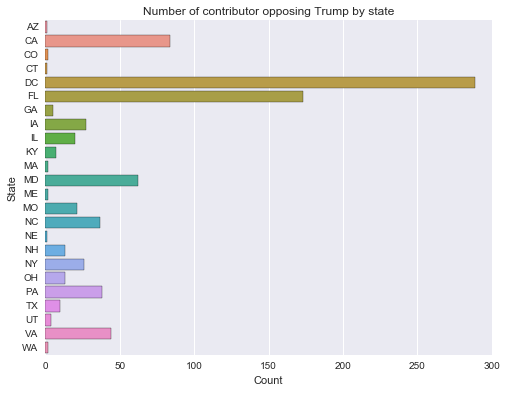

In [9]:
# 'TRUMP, DONALD J'
trump_entry = df[df.candidate_name == 'TRUMP, DONALD J']
trump_entry = trump_entry[trump_entry.support_oppose_indicator == 'O']
trump_state = trump_entry.groupby(trump_entry.payee_state)\
              [['payee_state','support_oppose_indicator']].size()

trump_index = trump_state.index
trump_val = trump_state.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = trump_val,y=trump_index,orient='h',ax=ax)
plt.title('Number of contributor opposing Trump by state')
plt.ylabel('State')
plt.xlabel('Count')

# Support Trump

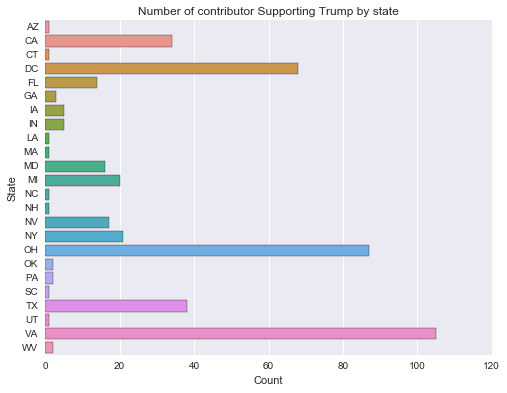

In [10]:
# 'TRUMP, DONALD J'
support =['S','SUP']
trump_entry = df[df.candidate_name == 'TRUMP, DONALD J']
trump_entry = trump_entry[trump_entry.support_oppose_indicator.isin(support)]
trump_state = trump_entry.groupby(trump_entry.payee_state)\
              [['payee_state','support_oppose_indicator']].size()

trump_index = trump_state.index
trump_val = trump_state.values
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = trump_val,y=trump_index,orient='h',ax=ax)
plt.title('Number of contributor Supporting Trump by state')
plt.ylabel('State')
plt.xlabel('Count')

# Oppose Obama by state

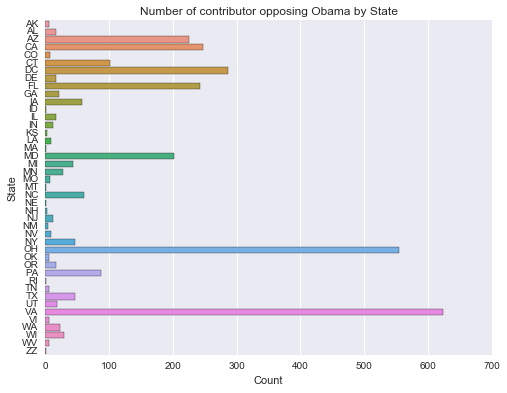

In [11]:
# 'OBAMA, BARACK'
obama_entry = df[df.candidate_name == 'OBAMA, BARACK']
obama_entry = obama_entry[obama_entry.support_oppose_indicator == 'O']
obama_state = obama_entry.groupby(obama_entry.payee_state)\
              [['payee_state','support_oppose_indicator']].size()
obama_idx = obama_state.index
obama_val = obama_state.values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = obama_val , y=obama_idx,ax=ax,orient='h')
plt.title('Number of contributor opposing Obama by State')
plt.ylabel('State')
plt.xlabel('Count')

# Support Obama by state

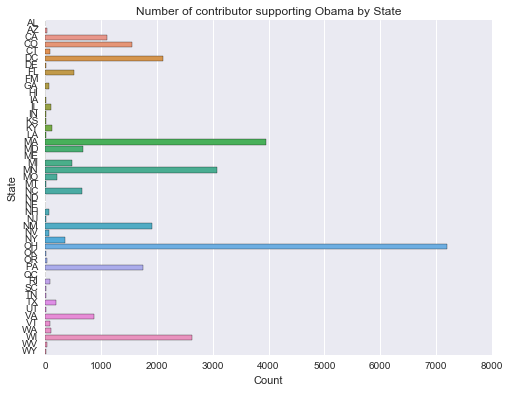

In [12]:
# 'OBAMA, BARACK'
obama_entry = df[df.candidate_name == 'OBAMA, BARACK']
obama_entry = obama_entry[obama_entry.support_oppose_indicator.isin(support)]
obama_state = obama_entry.groupby(obama_entry.payee_state)\
              [['payee_state','support_oppose_indicator']].size()
obama_idx = obama_state.index
obama_val = obama_state.values


fig,ax = plt.subplots(figsize=(8,6))
ax = sns.barplot(x = obama_val , y=obama_idx,ax=ax,orient='h')
 
plt.title('Number of contributor supporting Obama by State')
plt.ylabel('State')
plt.xlabel('Count')

# Number of contributor opposing Hillary by state

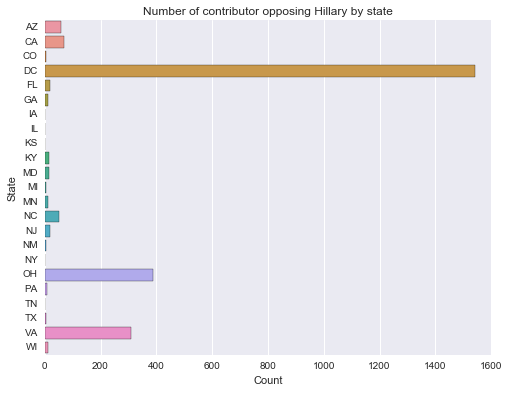

In [13]:
#Hilary Clinton
# 'HILLARY RODHAM'
#HILLYER, RICHARD Q
#'CLINTON, HILLARY RODHAM'
hillary_entry = df[df.candidate_name =='CLINTON, HILLARY RODHAM']
hillary_state = hillary_entry[hillary_entry.support_oppose_indicator =='O']
hillary_state = hillary_state.groupby(hillary_state.payee_state)\
                [['payee_state','support_oppose_indicator']].size()
hillary_idx = hillary_state.index
hillary_val = hillary_state.values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = hillary_val,y=hillary_idx,orient='h')
plt.title('Number of contributor opposing Hillary by state')
plt.ylabel('State')
plt.xlabel('Count')

# Number of contributor supporting Hillary by state

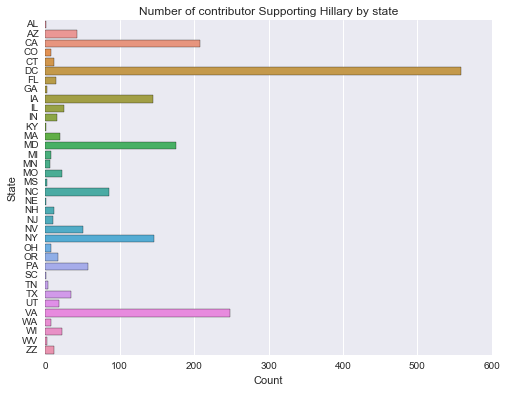

In [14]:
#Hilary Clinton
# 'HILLARY RODHAM'
#HILLYER, RICHARD Q
#'CLINTON, HILLARY RODHAM'
hillary_entry = df[df.candidate_name =='CLINTON, HILLARY RODHAM']
hillary_state = hillary_entry[hillary_entry.support_oppose_indicator.isin(support)]
hillary_state = hillary_state.groupby(hillary_state.payee_state)\
                [['payee_state','support_oppose_indicator']].size()
hillary_idx = hillary_state.index
hillary_val = hillary_state.values

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = hillary_val,y=hillary_idx,orient='h')
plt.title('Number of contributor Supporting Hillary by state')
plt.ylabel('State')
plt.xlabel('Count')

# Number of contributor supporting rate Hillary by state

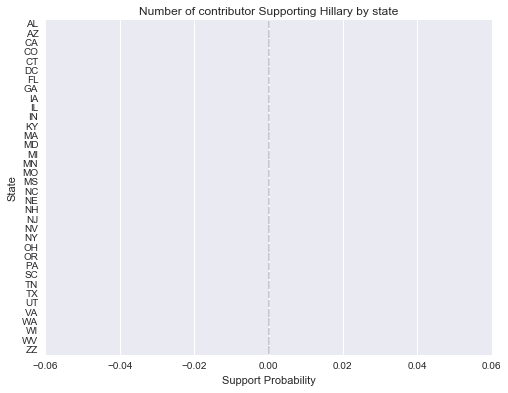

In [17]:
#Hilary Clinton
# 'HILLARY RODHAM'
#HILLYER, RICHARD Q
#'CLINTON, HILLARY RODHAM'
hillary_entry = df[df.candidate_name =='CLINTON, HILLARY RODHAM']
total_hillary = len(hillary_entry)
hillary_state = hillary_entry[hillary_entry.support_oppose_indicator.isin(support)]
hillary_state = hillary_state.groupby(hillary_state.payee_state)[['payee_state','support_oppose_indicator']].size()
hillary_idx = hillary_state.index
hillary_val = hillary_state.values
hillary_prob = hillary_val / total_hillary

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = hillary_prob,y=hillary_idx,orient='h')
plt.title('Number of contributor Supporting Hillary by state')
plt.ylabel('State')
plt.xlabel('Support Probability')

# Number of contributor opposing rate Hillary by state

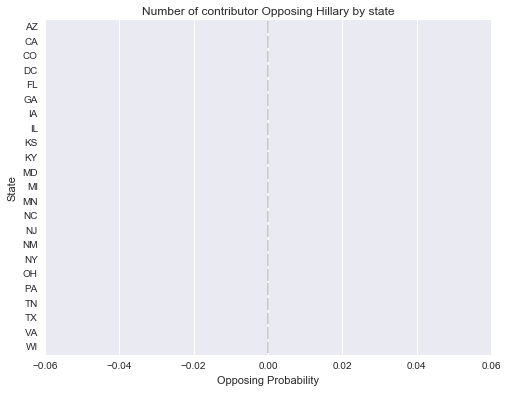

In [16]:
#Hilary Clinton
# 'HILLARY RODHAM'
#HILLYER, RICHARD Q
#'CLINTON, HILLARY RODHAM'
hillary_entry = df[df.candidate_name =='CLINTON, HILLARY RODHAM']
total_hillary = len(hillary_entry)
hillary_state = hillary_entry[hillary_entry.support_oppose_indicator == 'O']
hillary_state = hillary_state.groupby(hillary_state.payee_state)\
                [['payee_state','support_oppose_indicator']].size()
hillary_idx = hillary_state.index
hillary_val = hillary_state.values
hillary_prob = hillary_val / total_hillary

fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = hillary_prob,y=hillary_idx,orient='h')
plt.title('Number of contributor Opposing Hillary by state')
plt.ylabel('State')
plt.xlabel('Opposing Probability')

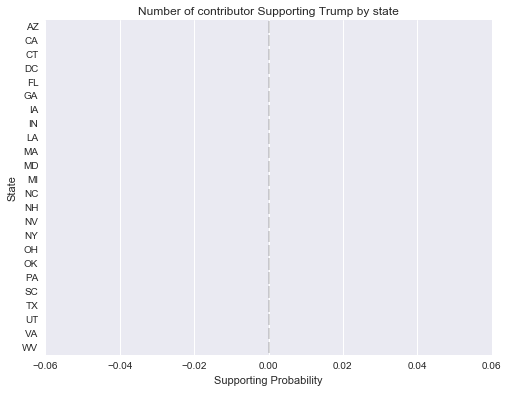

In [18]:
# 'TRUMP, DONALD J'
support =['S','SUP']
trump_entry = df[df.candidate_name == 'TRUMP, DONALD J']
total_trump = len(trump_entry)
trump_entry = trump_entry[trump_entry.support_oppose_indicator.isin(support)]
trump_state = trump_entry.groupby(trump_entry.payee_state)\
              [['payee_state','support_oppose_indicator']].size()

trump_index = trump_state.index
trump_val = trump_state.values
trump_prob = trump_val / total_trump
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x = trump_prob,y=trump_index,orient='h',ax=ax)
plt.title('Number of contributor Supporting Trump by state')
plt.ylabel('State')
plt.xlabel('Supporting Probability')

# total Trump support vs total Hillary support

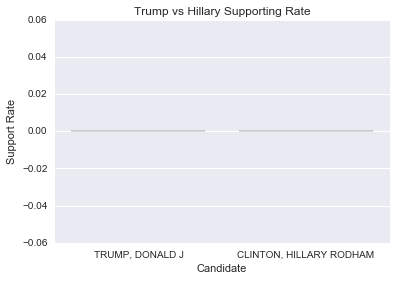

In [19]:
# 'TRUMP, DONALD J'
support =['S','SUP']
trump_entry = df[df.candidate_name == 'TRUMP, DONALD J']
total_trump = len(trump_entry)
trump_entry = trump_entry[trump_entry.support_oppose_indicator.isin(support)]
trump_state = trump_entry.groupby(trump_entry.payee_state)\
              [['payee_state','support_oppose_indicator']].size()

trump_index = trump_state.index
trump_val = trump_state.values
trump_prob = trump_val / total_trump
total_trump_support_prob = trump_prob.sum()

#Hilary Clinton
# 'HILLARY RODHAM'
#HILLYER, RICHARD Q
#'CLINTON, HILLARY RODHAM'
hillary_entry = df[df.candidate_name =='CLINTON, HILLARY RODHAM']
total_hillary = len(hillary_entry)
hillary_state = hillary_entry[hillary_entry.support_oppose_indicator.isin(support)]
hillary_state = hillary_state.groupby(hillary_state.payee_state)\
                [['payee_state','support_oppose_indicator']].size()
hillary_idx = hillary_state.index
hillary_val = hillary_state.values
hillary_prob = hillary_val / total_hillary
total_hillary_support_prob = hillary_prob.sum()

total_support_prob =[]
total_support_prob.append(total_trump_support_prob)
total_support_prob.append(total_hillary_support_prob)
candidate = ['TRUMP, DONALD J','CLINTON, HILLARY RODHAM']
support_prob = pd.DataFrame({'Candidate':candidate,'Support Rate':total_support_prob})
sns.barplot(data=support_prob,x='Candidate',y='Support Rate')
plt.ylabel('Support Rate')
plt.xlabel('Candidate')
plt.title('Trump vs Hillary Supporting Rate')